In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling  # direk EDA yapiyor
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
df=sns.load_dataset("iris")  # built-in-dataset

In [3]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
df.shape

(150, 5)

In [5]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

In [6]:
# k means algorithm requires scaling!!! there is distance.
# however only for this data the values are similar to eachother

In [7]:
df.species.value_counts()  # 3 cluster are here.

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


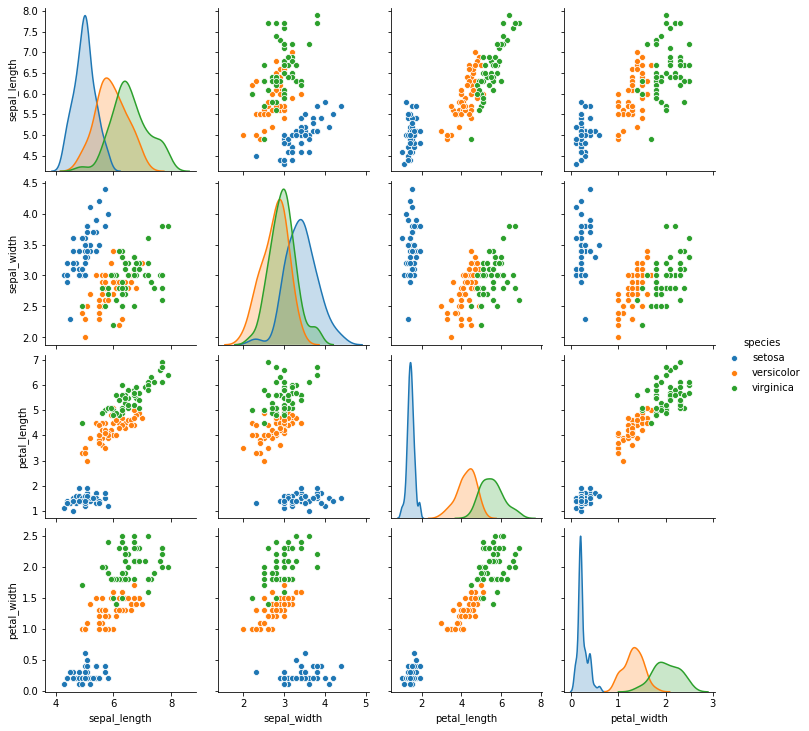

In [9]:
sns.pairplot(df, hue="species")
plt.show()

In [10]:
X=df.drop("species", axis=1)

In [11]:
X.shape

(150, 4)

In [12]:
X.head()  # wir werden über dies arbeiten.

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

## Hopkins Test
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability and a score tending to 0 express a high cluster tendency.

In [13]:
# pip install pyclustertend

In [14]:
from pyclustertend import hopkins

In [15]:
X.shape

(150, 4)

In [16]:
hopkins(X, X.shape[0])

0.15980430904218823

## Elbow Method

In [17]:
ssd = []  # square sum of differences
K = range(1, 10)

In [18]:
for k in K:
    model = KMeans(n_clusters = k)
    model.fit(X)
    ssd.append(model.inertia_)

In [19]:
ssd

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.3058152958153,
 30.378860962566847,
 27.82132797903851]

Text(0.5, 1.0, 'Elbow Method')

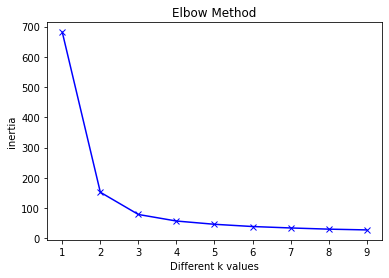

In [20]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia")
plt.title("Elbow Method")

In [21]:
# keskin düsüsun bittigi yeri direk alicaz. Dirsegin en son kirildigi yeri alicaz: 3

In [22]:
# new model

In [23]:
model = KMeans(n_clusters = 3)
model.fit(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
model.inertia_  # our errors

78.85144142614601

In [25]:
model.labels_  # 150 values-predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
clusters = model.labels_ # Normally, these labels are inserted to the X

In [27]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [28]:
df["predicted_clusters"] = clusters

In [29]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   predicted_clusters  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [30]:
df.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species  \
90            5.5          2.6           4.4          1.2  versicolor   
137           6.4          3.1           5.5          1.8   virginica   
53            5.5          2.3           4.0          1.3  versicolor   
31            5.4          3.4           1.5          0.4      setosa   
66            5.6          3.0           4.5          1.5  versicolor   
98            5.1          2.5           3.0          1.1  versicolor   
79            5.7          2.6           3.5          1.0  versicolor   
76            6.8          2.8           4.8          1.4  versicolor   
12            4.8          3.0           1.4          0.1      setosa   
125           7.2          3.2           6.0          1.8   virginica   

     predicted_clusters  
90                    0  
137                   2  
53                    0  
31                    1  
66                    0  
98                    0  
79                    0  
76                    0  
12                    1  
125                   2

In [31]:
ct = pd.crosstab(df.predicted_clusters, df.species) # iki sütunu carpistiriyor

In [32]:
ct.T

predicted_clusters   0   1   2
species                       
setosa               0  50   0
versicolor          48   0   2
virginica           14   0  36

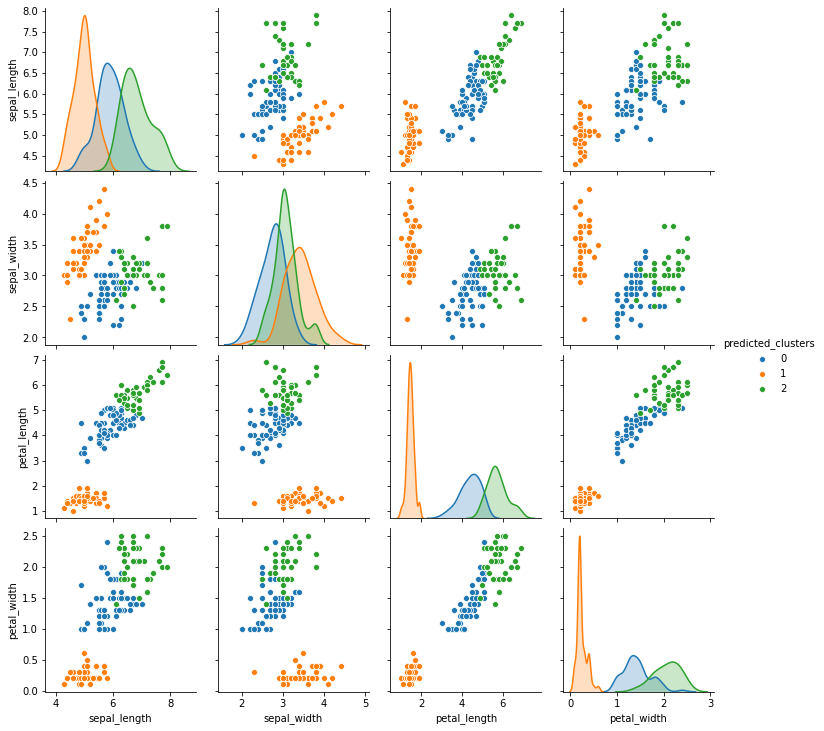

In [33]:
sns.pairplot(df, hue="predicted_clusters")
plt.show()

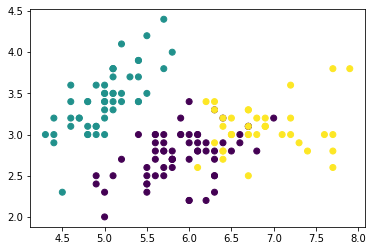

In [34]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap="viridis")

In [35]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [36]:
centers = model.cluster_centers_

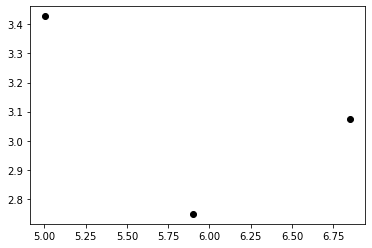

In [37]:
plt.scatter(centers[:,0], centers[:,1], c="black")

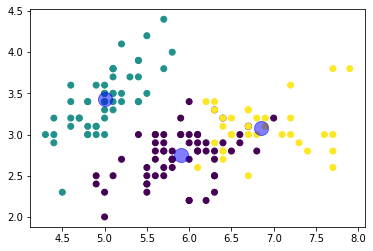

In [38]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, cmap = "viridis")
plt.scatter(centers[:,0], centers[:,1], c = "blue", s =200, alpha = 0.5)

In [39]:
centers[:,1]

array([2.7483871 , 3.428     , 3.07368421])

### Iki önemli nokta var:
### 1)     Model oncesinde model inertia degerlerine bakiyoruz. Minimum inertia degerinin oldugu minimum k degerini tespit etmeye calisiyoruz. Bu bizim optimal k degerimizdir.
### 2)     Model bittikten sonra ise modelimizin sundugu label degerlerini ve centroidleri ayni grafikte birlestirip cluster lari fark edebiliriz.

## Hierarchy Clustering

In [41]:
from scipy.cluster.hierarchy import linkage

In [42]:
hc_complete = linkage(X, "complete")
hc_ward = linkage(X, "ward")

In [43]:
from scipy.cluster.hierarchy import dendrogram

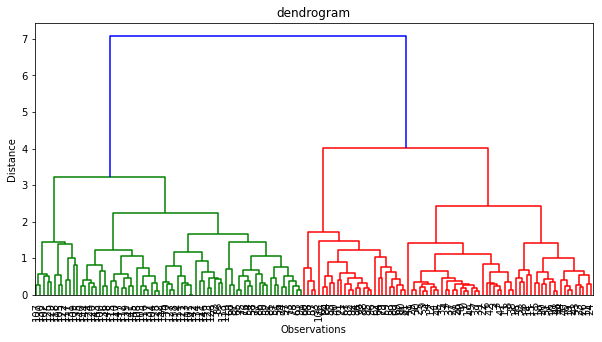

In [44]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10)
plt.show()

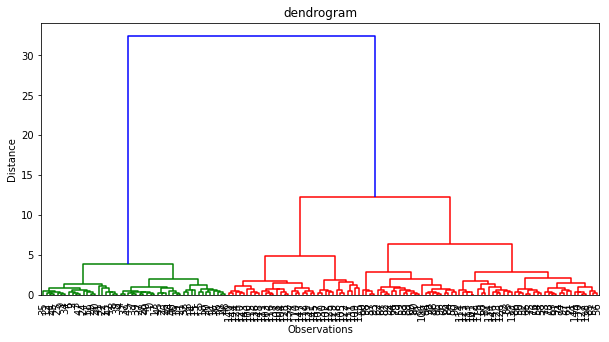

In [45]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10)
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

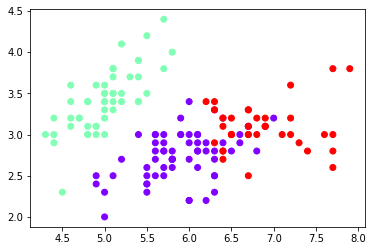

In [55]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap="rainbow")

In [56]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=3, ward): {silhouette_score(X, cluster.labels_)}')

Silhouette Score(n=3, ward): 0.5543236611296426


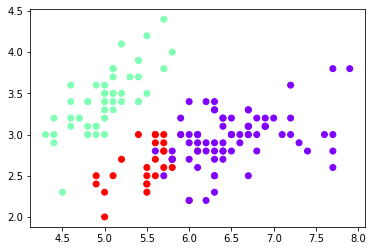

In [57]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
cluster.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap="rainbow")

In [58]:
print(f'Silhouette Score(n=3, complete): {silhouette_score(X, cluster.labels_)}')

Silhouette Score(n=3, complete): 0.513595322119222


In [60]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [61]:
clusters = model.labels_

In [62]:
df["hierarchic_clusters"] = clusters

In [63]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     predicted_clusters  hierarchic_clusters  
0                     1                    1  
1                     1                    1  
2                     1                    1  
3                     1                    1  
4                     1                    1  
..                  ...                  ...  
145                   2                    2  
146                   0                    0  
147                   2                    2  
148                   2                    2  
149                   0                    0  

[150 rows x 7 columns]

In [64]:
ct = pd.crosstab(df.hierarchic_clusters, df.species) # iki sütunu carpistiriyor

In [65]:
ct.T

hierarchic_clusters   0   1   2
species                        
setosa                0  50   0
versicolor           49   0   1
virginica            15   0  35

In [66]:
map_dict = {"virginica": 2, "setosa": 1, "versicolor": 0}

In [67]:
df["original_classes"] = df.species.map(map_dict)

In [68]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     predicted_clusters  hierarchic_clusters  original_classes  
0                     1                    1                 1  
1                     1                    1                 1  
2                     1                    1                 1  
3                     1                    1                 1  
4                     1                    1                 1  
..                  ...                  ...               ...  
145                   2                    2                 2  
146                   0                    0                 2  
147                   2                    2                 2  
148                   2                    2                 2  
149                   0                    0                 2  

[150 rows x 8 columns]

In [70]:
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width    species  \
18            5.7          3.8           1.7          0.3     setosa   
118           7.7          2.6           6.9          2.3  virginica   
131           7.9          3.8           6.4          2.0  virginica   
128           6.4          2.8           5.6          2.1  virginica   
10            5.4          3.7           1.5          0.2     setosa   

     predicted_clusters  hierarchic_clusters  original_classes  
18                    1                    1                 1  
118                   2                    2                 2  
131                   2                    2                 2  
128                   2                    2                 2  
10                    1                    1                 1

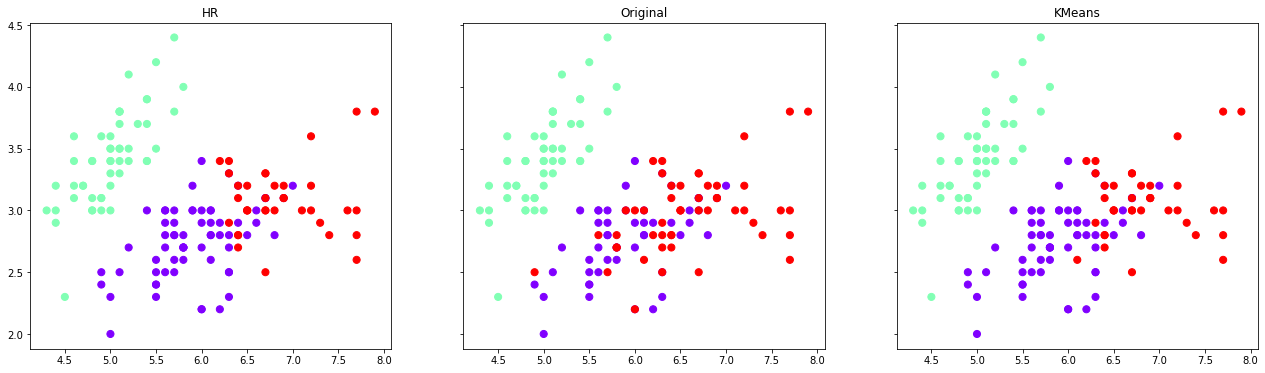

In [86]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(22, 6))
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.hierarchic_clusters, s = 50, cmap = "rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")
ax3.set_title("KMeans")
ax3.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow")

In [83]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7302382722834697

In [85]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df['species'], df['hierarchic_clusters'])

0.7311985567707745

In [ ]:
print(f"Silhouette Score(n=3): {silhouette_score(X, model.labels_)}")